# Wikipedia article - contribution analysis

## Inspired by Aaron Swartz's "Who writes Wikipedia?" 

Work in progress...

https://en.wikipedia.org/w/index.php?title=Aaron_Swartz&action=info

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd

## Data

### Wikipedia database
Shema
https://upload.wikimedia.org/wikipedia/commons/9/94/MediaWiki_1.28.0_database_schema.svg

Fields in the revisions table
https://www.mediawiki.org/wiki/Manual:Revision_table

SQL query in Quarry
https://quarry.wmflabs.org/query/24072

```SQL
SELECT rev_id, rev_user, rev_user_text, 
rev_deleted, rev_len, rev_parent_id, 
rev_timestamp 
FROM revision WHERE rev_page='2850681'
```



In [2]:
import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://quarry.wmflabs.org/run/228645/output/0/csv?download=true'


def get_data(filename='data/aaron.csv', url=URL,
                     force_download=False):
    """Download and cache the Quarry SQL query data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    df : pandas.DataFrame
        Wikipedia Aaron Swartz aritcle edits data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    df = pd.read_csv(filename, index_col='rev_timestamp')

    try:
        df.index = pd.to_datetime(df.index, format='%Y%m%d%H%M%S')
    except TypeError:
        df.index = pd.to_datetime(df.index)

    return df

In [3]:
df = get_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4062 entries, 2005-10-07 00:36:41 to 2018-01-13 18:43:17
Data columns (total 6 columns):
rev_id           4062 non-null int64
rev_user         4062 non-null int64
rev_user_text    4062 non-null object
rev_deleted      4062 non-null int64
rev_len          4054 non-null float64
rev_parent_id    4062 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 222.1+ KB


In [5]:
df[df['rev_deleted'] != 0]

,rev_id,rev_user,rev_user_text,rev_deleted,rev_len,rev_parent_id
rev_timestamp,,,,,,
2013-01-26 12:21:10,534973926,18329626,TheAnonymousOnes,3,NaN,534966506
2013-01-26 12:22:56,534974079,18329626,TheAnonymousOnes,3,NaN,534973942
2013-01-26 12:25:11,534974251,18329626,TheAnonymousOnes,3,NaN,534974100
2013-01-26 12:27:57,534974497,18329626,TheAnonymousOnes,3,NaN,534974277
2013-01-26 12:38:33,534975432,18329626,TheAnonymousOnes,3,NaN,534975193
2013-01-26 12:40:06,534975597,18329626,TheAnonymousOnes,3,NaN,534975487
2013-01-26 12:42:04,534975818,18329626,TheAnonymousOnes,3,NaN,534975651
2016-06-28 21:57:04,727422400,0,2601:19B:8303:8D1D:207D:BA09:8C68:8BC2,1,NaN,726086436


In [6]:
df.head(10)

,rev_id,rev_user,rev_user_text,rev_deleted,rev_len,rev_parent_id
rev_timestamp,,,,,,
2005-10-07 00:36:41,24934502,0,69.181.82.221,0,234.0,0
2005-10-07 00:44:17,24934951,0,69.181.82.221,0,378.0,24934502
2005-10-07 00:56:53,24935748,0,69.181.82.221,0,402.0,24934951
2005-10-07 01:04:36,24936222,0,216.220.208.110,0,408.0,24935748
2005-10-07 01:08:20,24936455,0,69.181.82.221,0,593.0,24936222
2005-10-07 01:09:30,24936531,0,69.181.82.221,0,593.0,24936455
2005-10-07 01:14:00,24936817,0,69.181.82.221,0,620.0,24936531
2005-10-07 01:47:43,24938924,20842,AaronSw,0,593.0,24936817
2005-10-07 01:48:04,24938952,20842,AaronSw,0,600.0,24938924


In [7]:
y = df['rev_len']
x = df.index

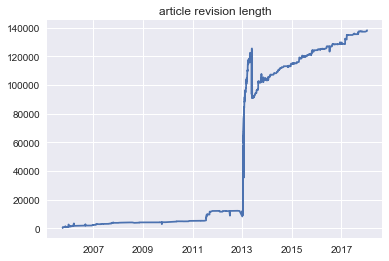

In [45]:
plt.plot(x,y)
plt.title('article revision length');

In [9]:
df2 = df[(df.index > '2013') & (df.index < '2014')]

y2 = df2['rev_len']
x2 = df2.index

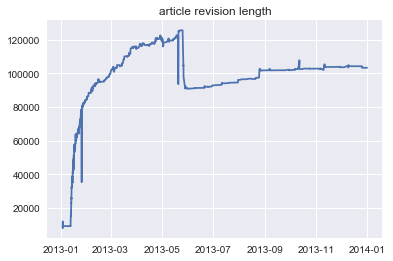

In [10]:
plt.plot(x2,y2)
plt.title('article revision length');

In [11]:
df_jan_feb = df[(df.index > '2013-01') & (df.index < '2013-03')]

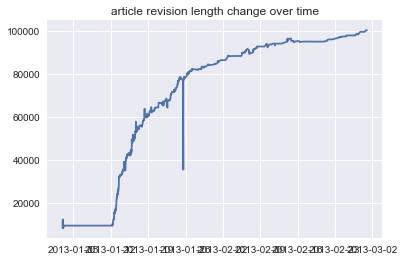

In [12]:
yy = df_jan_feb['rev_len']
xx = df_jan_feb.index

plt.plot(xx,yy)
plt.title('article revision length change over time');

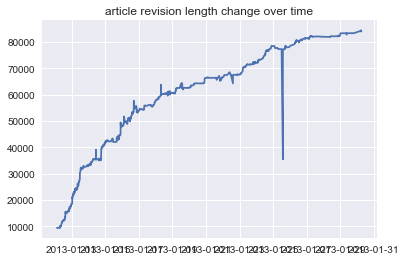

In [13]:
df_jan = df[(df.index > '2013-01-12') & (df.index < '2013-01-31')]

yyy = df_jan['rev_len']
xxx = df_jan.index

plt.plot(xxx,yyy)
plt.title('article revision length change over time');

''

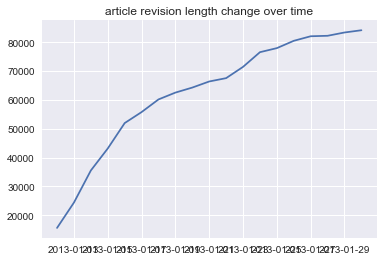

In [25]:
df_res = df_jan.resample('D').median()

yyyy = df_res['rev_len']
xxxx = df_res.index

plt.plot(xxxx,yyyy)
plt.title('article revision length change over time')
;

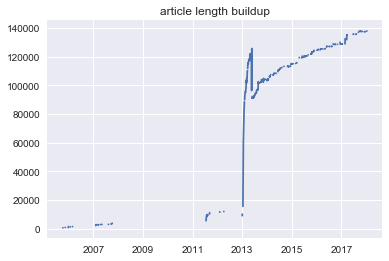

In [33]:
dfD = df.resample('D').median()

yD = dfD['rev_len']
xD = dfD.index

plt.plot(xD,yD);
plt.title('article length buildup');

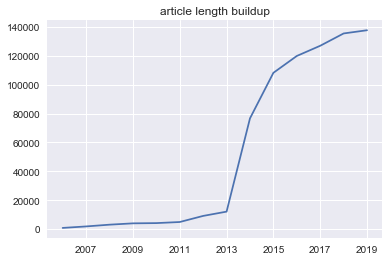

In [34]:
dfA = df.resample('A').median()

yA = dfA['rev_len']
xA = dfA.index

plt.plot(xA,yA);
plt.title('article length buildup');

# To be continued from here...

In [19]:
df['edit_size'] = df['rev_len'] - df['rev_len'].shift(+1)

In [20]:
df.head(10)

,rev_id,rev_user,rev_user_text,rev_deleted,rev_len,rev_parent_id,edit_size
rev_timestamp,,,,,,,
2005-10-07 00:36:41,24934502,0,69.181.82.221,0,234.0,0,NaN
2005-10-07 00:44:17,24934951,0,69.181.82.221,0,378.0,24934502,144.0
2005-10-07 00:56:53,24935748,0,69.181.82.221,0,402.0,24934951,24.0
2005-10-07 01:04:36,24936222,0,216.220.208.110,0,408.0,24935748,6.0
2005-10-07 01:08:20,24936455,0,69.181.82.221,0,593.0,24936222,185.0
2005-10-07 01:09:30,24936531,0,69.181.82.221,0,593.0,24936455,0.0
2005-10-07 01:14:00,24936817,0,69.181.82.221,0,620.0,24936531,27.0
2005-10-07 01:47:43,24938924,20842,AaronSw,0,593.0,24936817,-27.0
2005-10-07 01:48:04,24938952,20842,AaronSw,0,600.0,24938924,7.0


In [34]:
df['edit_size'].iloc[0] = df['rev_len'].iloc[0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
df.head()

,rev_id,rev_user,rev_user_text,rev_deleted,rev_len,rev_parent_id,edit_size
rev_timestamp,,,,,,,
2005-10-07 00:36:41,24934502,0,69.181.82.221,0,234.0,0,234.0
2005-10-07 00:44:17,24934951,0,69.181.82.221,0,378.0,24934502,144.0
2005-10-07 00:56:53,24935748,0,69.181.82.221,0,402.0,24934951,24.0
2005-10-07 01:04:36,24936222,0,216.220.208.110,0,408.0,24935748,6.0
2005-10-07 01:08:20,24936455,0,69.181.82.221,0,593.0,24936222,185.0


In [17]:
# gives a number of edits for each user
df.rev_user_text.value_counts().head()

Dervorguilla     631
David in DC      422
HectorMoffet     143
Ocaasi            96
MarkBernstein     93
Name: rev_user_text, dtype: int64

In [16]:
# https://stackoverflow.com/questions/38985053/pandas-groupby-and-sum-only-one-column
df2 = df.groupby(['rev_user_text'], as_index=False)['edit_size'].agg('sum').sort_values('edit_size', ascending=False)
df2.head()

,rev_user_text,edit_size
600,ClueBot NG,37054.0
638,Dervorguilla,30849.0
758,HectorMoffet,27421.0
968,Ocaasi,11178.0
517,Andy Dingley,10904.0


In [17]:
df2.shape

(1202, 2)

In [18]:
#df3 = df.groupby(['rev_user_text'], as_index=False)['edit_size'].agg('sum').sort_values('edit_size', ascending=False)

df3 = df.groupby(['rev_user_text'], as_index=False).agg(pd.Series.nunique).sort_values('edit_size', ascending=False)
df3.head(10)

,rev_user_text,rev_id,rev_user,rev_deleted,rev_len,rev_parent_id,edit_size
638,Dervorguilla,631,1,1,592.0,631,306.0
628,David in DC,422,1,1,375.0,422,185.0
758,HectorMoffet,143,1,1,142.0,143,109.0
886,MarkBernstein,93,1,1,86.0,93,77.0
968,Ocaasi,96,1,1,86.0,96,76.0
543,Bbb23,74,1,1,59.0,74,51.0
915,Mjb,42,1,1,41.0,42,39.0
786,JaggerAgain,42,1,1,40.0,42,37.0
869,Lgfcd,36,1,1,36.0,36,35.0
1122,Tbhotch,32,1,1,30.0,32,28.0


In [19]:
df3.shape

(1202, 7)

In [20]:
df4 = pd.merge(df2, df3, how='outer', on='rev_user_text')
df4.head(10)

,rev_user_text,edit_size_x,rev_id,rev_user,rev_deleted,rev_len,rev_parent_id,edit_size_y
0,ClueBot NG,37054.0,28,1,1,28.0,28,24.0
1,Dervorguilla,30849.0,631,1,1,592.0,631,306.0
2,HectorMoffet,27421.0,143,1,1,142.0,143,109.0
3,Ocaasi,11178.0,96,1,1,86.0,96,76.0
4,Andy Dingley,10904.0,20,1,1,19.0,20,18.0
5,184.89.37.240,7062.0,2,1,1,2.0,2,2.0
6,Popcrate,6988.0,7,1,1,7.0,7,7.0
7,AnomieBOT,6441.0,18,1,1,18.0,18,10.0
8,Adcolab2013,5291.0,1,1,1,1.0,1,1.0
9,JaggerAgain,4335.0,42,1,1,40.0,42,37.0


In [21]:
df4.shape

(1202, 8)

In [22]:
df4.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201],
           dtype='int64', length=1202)

In [23]:
df4['edit_size_x'].dtype

dtype('float64')

In [24]:
df4['percent'] = df4['edit_size_x'] / 1384

In [25]:
df4.head()

,rev_user_text,edit_size_x,rev_id,rev_user,rev_deleted,rev_len,rev_parent_id,edit_size_y,percent
0,ClueBot NG,37054.0,28,1,1,28.0,28,24.0,26.773121
1,Dervorguilla,30849.0,631,1,1,592.0,631,306.0,22.289740
2,HectorMoffet,27421.0,143,1,1,142.0,143,109.0,19.812861
3,Ocaasi,11178.0,96,1,1,86.0,96,76.0,8.076590
4,Andy Dingley,10904.0,20,1,1,19.0,20,18.0,7.878613


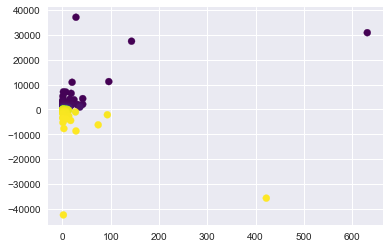

In [26]:
x = df4['rev_id']
y = df4['edit_size_x']
z = df4.index
size = df4['percent']
plt.scatter(x,y, c=z, cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


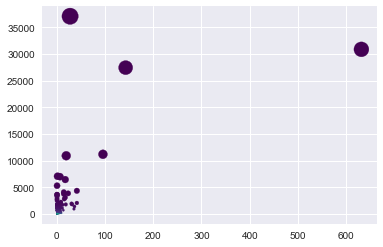

In [27]:
x = df4['rev_id']
y = df4['edit_size_x']
z = df4.index
size = 10*df4['percent']
plt.scatter(x,y, s=size, c=z, cmap='viridis')

## I lost the negatives in the percentage calculations
## i.e. the size definition went below zero
## so see .abs() below

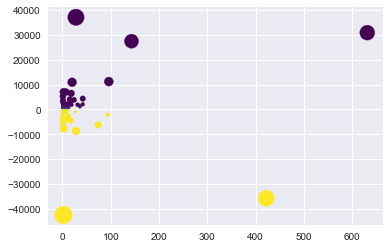

In [28]:
x = df4['rev_id']
y = df4['edit_size_x']
z = df4.index
size = 10*df4['percent'].abs()
plt.scatter(x,y, s=size, c=z, cmap='viridis')

In [29]:
df4['absolute'] = df4['edit_size_x'].abs()
df4.sort_values('absolute', ascending=False)
df4.head(10)

,rev_user_text,edit_size_x,rev_id,rev_user,rev_deleted,rev_len,rev_parent_id,edit_size_y,percent,absolute
0,ClueBot NG,37054.0,28,1,1,28.0,28,24.0,26.773121,37054.0
1,Dervorguilla,30849.0,631,1,1,592.0,631,306.0,22.289740,30849.0
2,HectorMoffet,27421.0,143,1,1,142.0,143,109.0,19.812861,27421.0
3,Ocaasi,11178.0,96,1,1,86.0,96,76.0,8.076590,11178.0
4,Andy Dingley,10904.0,20,1,1,19.0,20,18.0,7.878613,10904.0
5,184.89.37.240,7062.0,2,1,1,2.0,2,2.0,5.102601,7062.0
6,Popcrate,6988.0,7,1,1,7.0,7,7.0,5.049133,6988.0
7,AnomieBOT,6441.0,18,1,1,18.0,18,10.0,4.653902,6441.0
8,Adcolab2013,5291.0,1,1,1,1.0,1,1.0,3.822977,5291.0
9,JaggerAgain,4335.0,42,1,1,40.0,42,37.0,3.132225,4335.0


In [30]:
df4.tail(20)

,rev_user_text,edit_size_x,rev_id,rev_user,rev_deleted,rev_len,rev_parent_id,edit_size_y,percent,absolute
1182,Siroxo,-1785.0,1,1,1,1.0,1,1.0,-1.289740,1785.0
1183,MarkBernstein,-2168.0,93,1,1,86.0,93,77.0,-1.566474,2168.0
1184,NickCT,-2661.0,13,1,1,13.0,13,11.0,-1.922688,2661.0
1185,Youreallycan,-2811.0,12,1,1,12.0,12,11.0,-2.031069,2811.0
1186,PONCHO2049,-3317.0,1,1,1,1.0,1,1.0,-2.396676,3317.0
1187,Titodutta,-3552.0,1,1,1,1.0,1,1.0,-2.566474,3552.0
1188,71.209.138.234,-3615.0,2,1,1,2.0,2,2.0,-2.611994,3615.0
1189,Dreamyshade,-3794.0,8,1,1,8.0,8,8.0,-2.741329,3794.0
1190,Staszek Lem,-4468.0,17,1,1,16.0,17,17.0,-3.228324,4468.0
1191,NawlinWiki,-5291.0,1,1,1,1.0,1,1.0,-3.822977,5291.0


In [32]:
df['rev_user_text'].nunique()

1202

In [33]:
df3 = pd.DataFrame(df.rev_user_text.value_counts())
df3.head()

,rev_user_text
Dervorguilla,631
David in DC,422
HectorMoffet,143
Ocaasi,96
MarkBernstein,93
